In [55]:
import tensorflow as tf

In [56]:
from tensorflow.keras.layers import Input,Dense,Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg16 import  preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator ,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob


In [57]:
image_size=[224,224]
train_path = 'CM_PHOTOS/train'
test_path = 'CM_PHOTOS/Test'

In [58]:
vgg16 = VGG16(input_shape=image_size+[3],weights='imagenet',include_top=False)

In [59]:
for layer in vgg16.layers:
    layer.trainable=False

In [60]:
floders = glob('CM_PHOTOS/train/*')

In [61]:
x=Flatten()(vgg16.output)

In [62]:
prediction =Dense(len(floders),activation='softmax')(x)

In [63]:
model =Model(inputs=vgg16.input,outputs=prediction)

In [64]:
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0   

In [65]:
model.compile(
loss ='categorical_crossentropy',
optimizer='adam',
metrics=['accuracy']
)

In [66]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255,
                                    shear_range=0.2,
                                    zoom_range=0.2,
                                    horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)


In [67]:
training_set = train_datagen.flow_from_directory('CM_PHOTOS/train',
                                                target_size=(224,224),
                                                batch_size=32,
                                                class_mode='categorical')

Found 202 images belonging to 4 classes.


In [68]:
test_set = test_datagen.flow_from_directory('CM_PHOTOS/Test',
                                                target_size=(224,224),
                                                batch_size=32,
                                                class_mode='categorical')

Found 70 images belonging to 4 classes.


In [69]:
r =model.fit_generator(training_set,
                       validation_data=test_set,
                      epochs=10,
                      steps_per_epoch=len(training_set),
                      validation_steps=len(test_set))

Epoch 1/10
7/7 [==============================] - 36s 5s/step - loss: 1.8438 - acc: 0.3366 - val_loss: 0.8526 - val_acc: 0.7143
Epoch 2/10
7/7 [==============================] - 36s 5s/step - loss: 0.9903 - acc: 0.5891 - val_loss: 0.3954 - val_acc: 0.9000
Epoch 3/10
7/7 [==============================] - 39s 6s/step - loss: 0.5323 - acc: 0.7970 - val_loss: 0.6596 - val_acc: 0.8286
Epoch 4/10
7/7 [==============================] - 42s 6s/step - loss: 0.3204 - acc: 0.8861 - val_loss: 0.1668 - val_acc: 0.9571
Epoch 5/10
7/7 [==============================] - 41s 6s/step - loss: 0.1653 - acc: 0.9554 - val_loss: 0.1391 - val_acc: 0.9571
Epoch 6/10
7/7 [==============================] - 43s 6s/step - loss: 0.1154 - acc: 0.9802 - val_loss: 0.0941 - val_acc: 0.9857
Epoch 7/10
7/7 [==============================] - 42s 6s/step - loss: 0.1326 - acc: 0.9703 - val_loss: 0.0622 - val_acc: 0.9857
Epoch 8/10
7/7 [==============================] - 42s 6s/step - loss: 0.0858 - acc: 0.9802 - val_loss: 0

In [70]:
from tensorflow.keras.models import load_model
model.save('model_vgg16.h5')

In [71]:
y_pred =model.predict(test_set)

In [72]:
import numpy as np
y_pred =np.argmax(y_pred,axis=1)

In [73]:
y_pred

array([2, 3, 2, 0, 0, 2, 2, 0, 1, 1, 3, 3, 1, 2, 0, 0, 0, 0, 3, 2, 0, 0,
       0, 3, 3, 2, 2, 1, 2, 1, 0, 2, 3, 2, 3, 2, 3, 2, 2, 3, 2, 2, 0, 1,
       0, 3, 3, 0, 0, 3, 3, 1, 0, 1, 1, 2, 2, 0, 0, 3, 3, 2, 3, 3, 0, 1,
       3, 3, 0, 2], dtype=int64)

In [74]:
img=image.load_img('CM_PHOTOS/finding.jpg',target_size=(224,224))

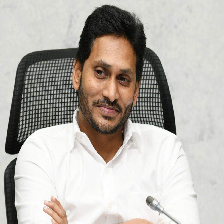

In [75]:
img

In [76]:
#converting to the array
x=image.img_to_array(img)

In [77]:
x.shape

(224, 224, 3)

In [78]:
x=x/255
test_image=np.expand_dims(x,axis=0)
result=model.predict(test_image)

In [79]:
result

array([[9.9128270e-01, 7.3144021e-03, 7.8413764e-04, 6.1870198e-04]],
      dtype=float32)

In [80]:
final=np.argmax(model.predict(test_image),axis=1)

In [81]:
if final==0:
    print('AP CM jagan')
elif final==1:
    print('Telagana CM KCR')
elif final==2:
    print('Narendra modi')
else:
    print('Tamil nadu CM Stalin')
    

AP CM jagan
